## Insurance EDA
This notebook involves Exploratory Data Analysis (EDA) on historical insurance claim data for AlphaCare Insurance Solutions (ACIS). 

Notebook Description
The insurance_EDA.ipynb notebook performs the following tasks:

 - Data loading and initial exploration
 - Data quality assessment
 - Handling missing values
 - Univariate analysis of numerical and categorical variables
 - Bivariate and multivariate analysis
 - Data comparison across different factors
 - Outlier detection
 - Insightful visualizations

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# importing modules from scripts 
from scripts.data_processing import *

In [4]:
# load insurance data from .txt file as a CSV, using '|' as the delimiter
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', low_memory=False)


In [5]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### Exploratory Data Analysis

In [6]:
# shape of the data 
df.shape

(1000098, 52)

There are 1000098 rows and 52 columns in the data.

In [7]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

There are 37 categorical columns and 15 numerical columns.
- bool type -1
- float type - 11
- int type - 4 
- object - 36

In [8]:
# statistical measures for numerical columns
print(df.describe())

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [9]:
# Lists all column names in the dataset
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [10]:
# Data Structure of each column 
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

### Data Quality Assessment
 check for missing values, duplicates, and calculate the percentage of missing data for each column.

In [11]:
# Check for missing values
print(df.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [12]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [13]:
# percentage of missing values 
calculate_missing_percentage(df)

The dataset has 9.74% missing values.


The below table presents a summary of missing data for various columns in a dataset.

In [14]:
# Data Quality Assessment. # total missing values and it's percentage 
missing_data = check_missing_values(df)
missing_data

,Missing Values,% of Total Values,Data type
NumberOfVehiclesInFleet,1000098,100.00,float64
CrossBorder,999400,99.93,object
CustomValueEstimate,779642,77.96,float64
Rebuilt,641901,64.18,object
Converted,641901,64.18,object
WrittenOff,641901,64.18,object
NewVehicle,153295,15.33,object
Bank,145961,14.59,object
AccountType,40232,4.02,object
Gender,9536,0.95,object


The dataframe contains 52 columns.
22 columns have missing values.

### Handling Missing values 
 drop columns with a high percentage of missing values and impute remaining missing values.

drop columns with high percentage of missing values (>50%): 
- NumberOfVehiclesInFleet(100% missing)
- CrossBorder (99.93 %)
- CustomValueEstimate(77.96%)
- Rebuilt(64.18%)
- Converted(64.18%)
- WrittenOff(64.18%)

In [15]:
# Drop columns with missing values above the specified threshold(50%).
df_cleaned= drop_high_missing_columns(df)

Dropped columns: ['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']


for the rest of the data
- For categorical columns, impute missing values using the mode (most frequent value). 
- For numerical columns, it uses the median to fill in missing values.

In [16]:
df= impute_missing_values(df_cleaned)

check remaining missing values

In [17]:
# Data Quality Assessment. # total missing values and it's percentage 
missing_data = check_missing_values(df)
missing_data

,Missing Values,% of Total Values,Data type
UnderwrittenCoverID,0,0.0,int64
PolicyID,0,0.0,int64
TransactionMonth,0,0.0,object
IsVATRegistered,0,0.0,bool
Citizenship,0,0.0,object
LegalType,0,0.0,object
Title,0,0.0,object
Language,0,0.0,object
Bank,0,0.0,object
AccountType,0,0.0,object


convert the 'VehicleIntroDate'  from object to  datetime format for performing time based analysis 

In [18]:
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], format='mixed', utc=True)

#### missing data imputation.
Utilize the Title column (containing values like 'Mr', 'Mrs', 'Miss', etc.) to infer and impute the missing Gender values.

In [20]:
df['Title'].unique()

array(['Mr', 'Dr', 'Miss', 'Mrs', 'Ms'], dtype=object)

In [21]:
df['Gender'].unique()

array(['Not specified', 'Male', 'Female'], dtype=object)

In [22]:
count = (df['Gender'] == 'Not specified').sum()

print(count)

950526


In [23]:
# Define mappings for Title to Gender
title_to_gender = {
    'Mr': 'Male',
    'Mrs': 'Female',
    'Miss': 'Female',
    'Ms': 'Female',
}

# Update Gender based on Title where Gender is 'not specified'
df.loc[(df['Gender'] == 'Not specified') & (df['Title'] != 'Dr'), 'Gender'] = df['Title'].map(title_to_gender)

In [24]:
count = (df['Gender'] == 'Not specified').sum()

print(count)

810


## Univariate Analysis
 Plot histograms for numerical columns and bar charts for categorical columns to understand distributions.
 on selected key columns from the dataset

### Distribution of numerical columns

Histograms for Numerical Columns:


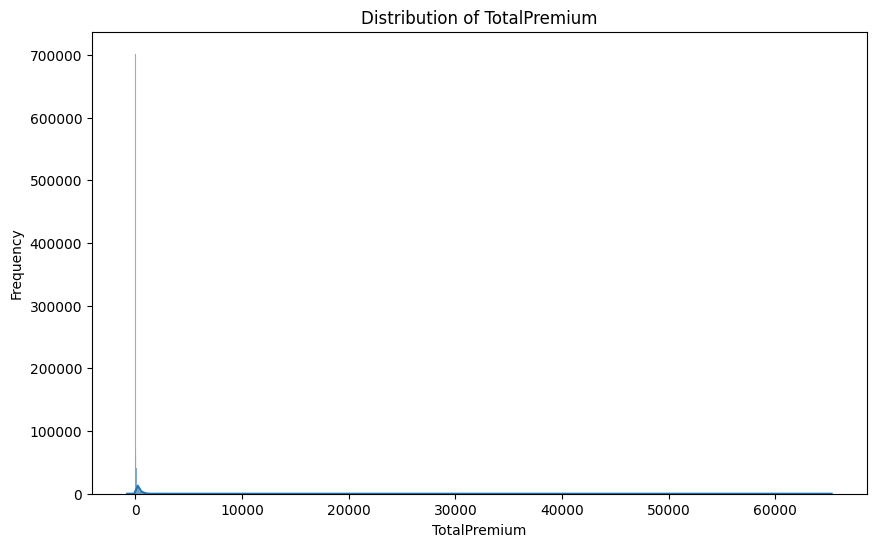

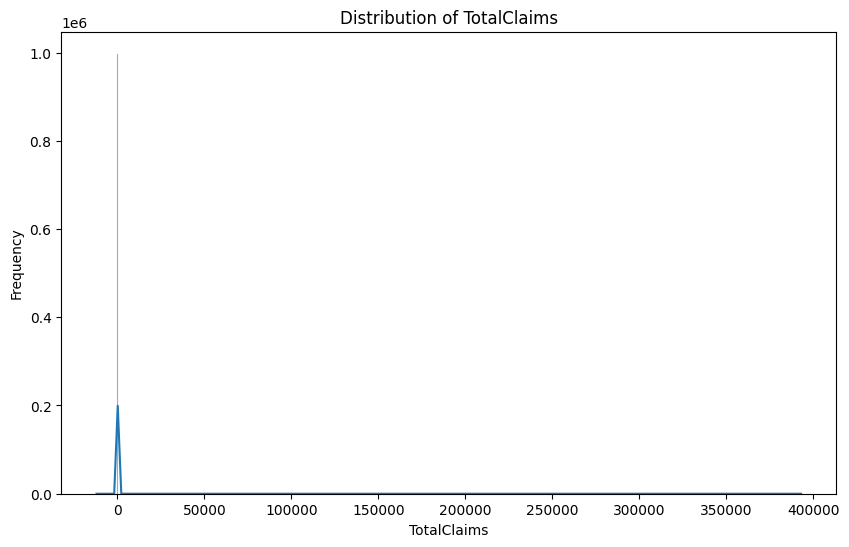

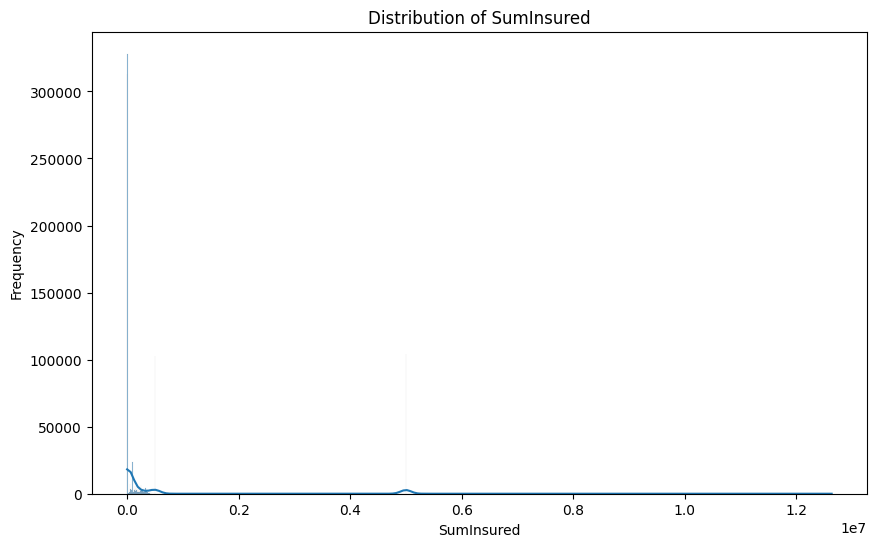

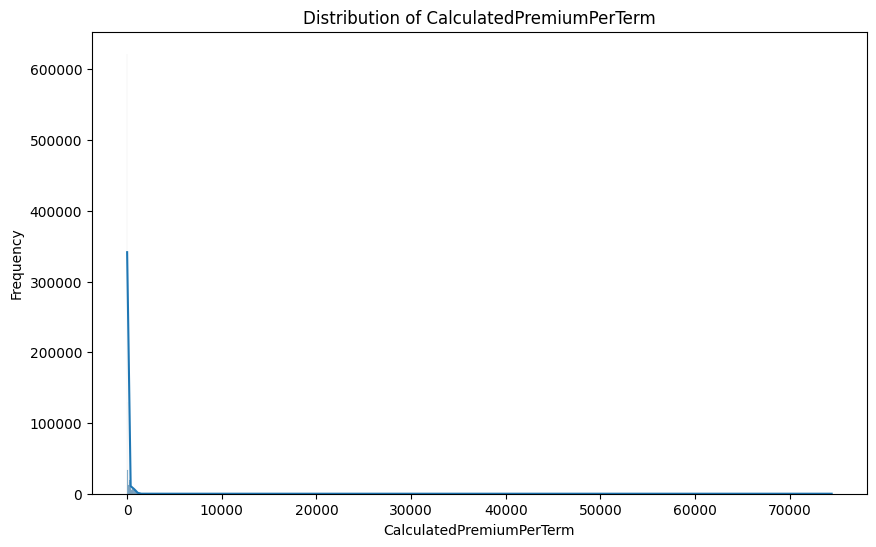

In [25]:
#  univariate analysis for key numerical columns

numerical_columns= ['TotalPremium',	 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']

# Plot histograms for key numerical columns
print("Histograms for Numerical Columns:")
for col in numerical_columns:
    plot_histogram(df, col)

#### insights from the univariate analysis of numeric columns 
- Premium Distribution: Premium amounts were skewed towards the lower end, with a few high-premium outliers.
- Claims Distribution: A similar skew was observed in claims, indicating that most policyholders make smaller claims, but a few outliers represent significantly higher claim amounts.
- The distribution of the Sum Insured is right-skewed, where the majority of policies have lower insured amounts, while a few have significantly higher sums.


### Distribution of categorical columns

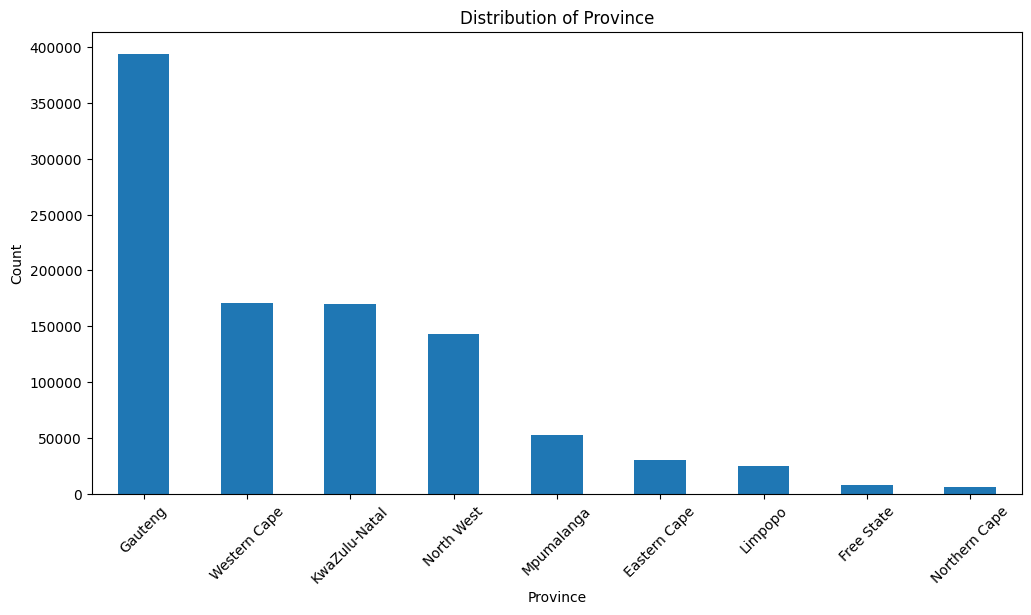

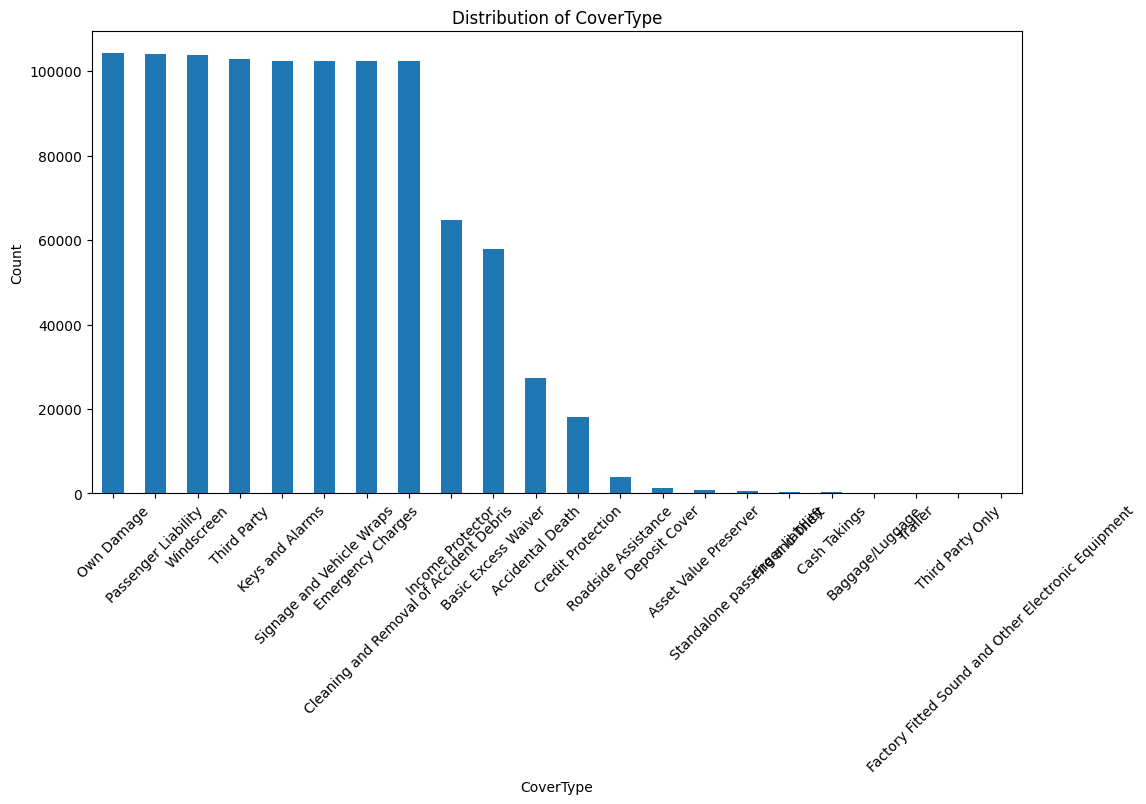

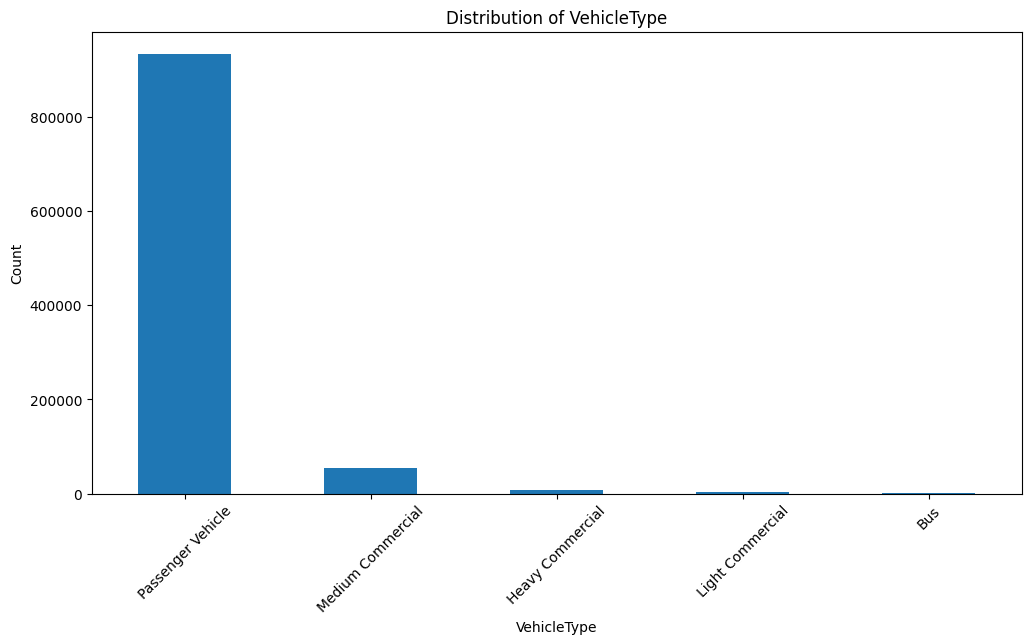

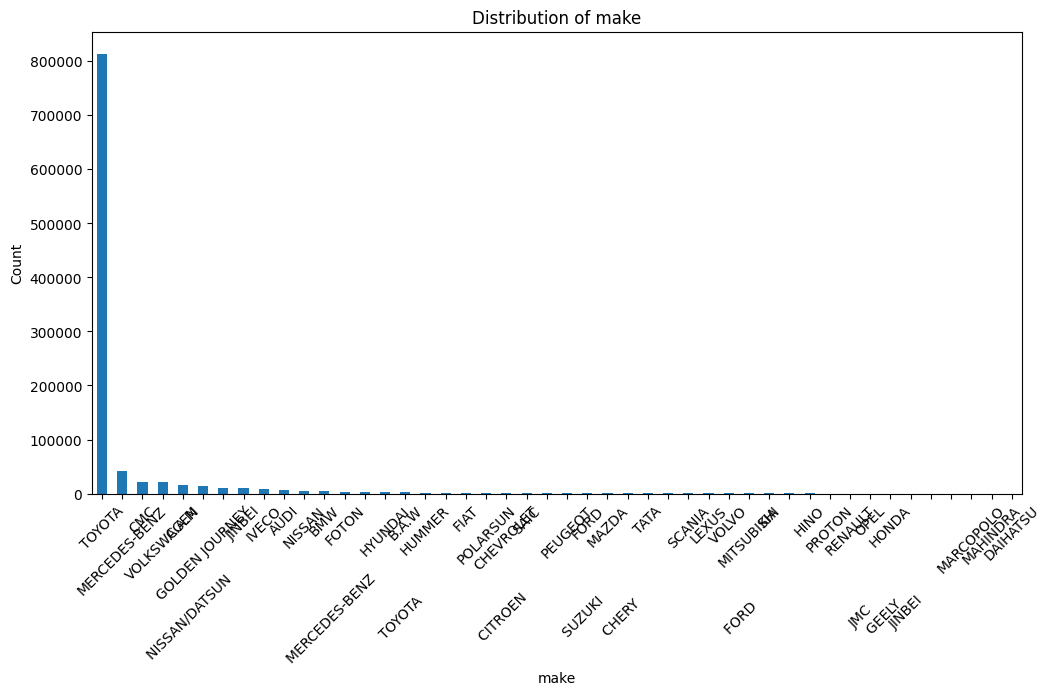

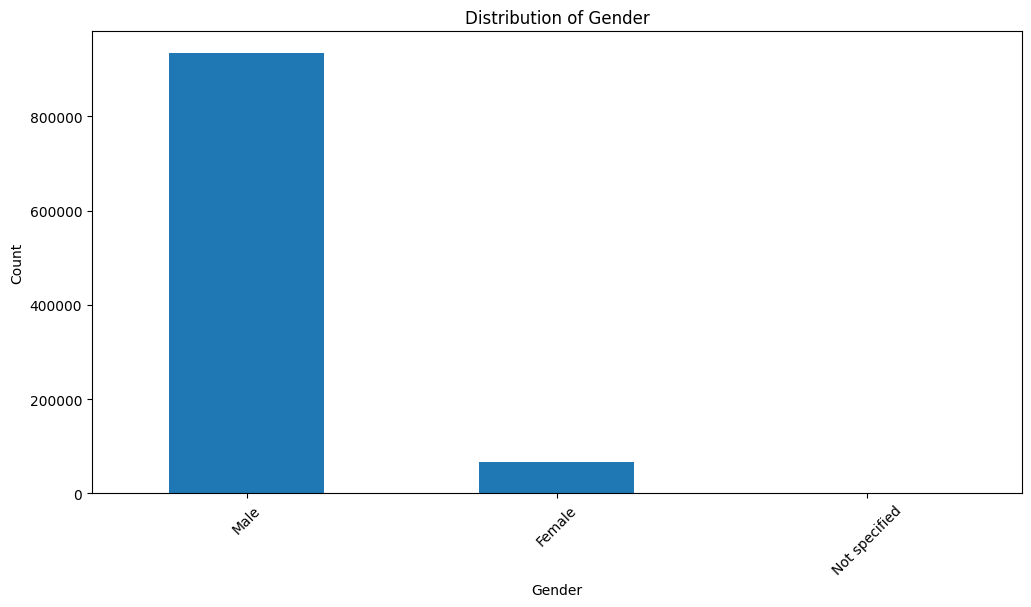

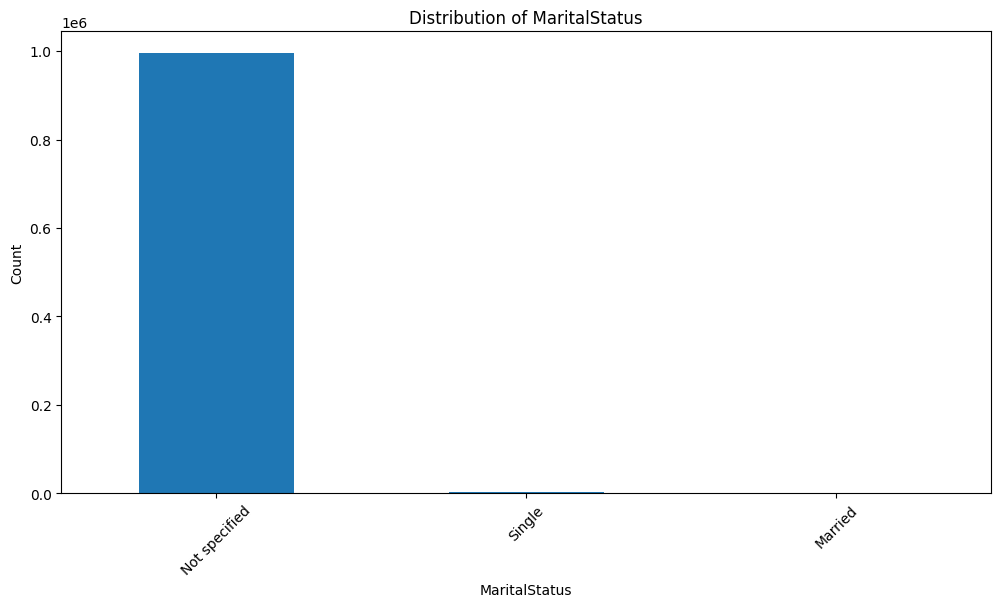

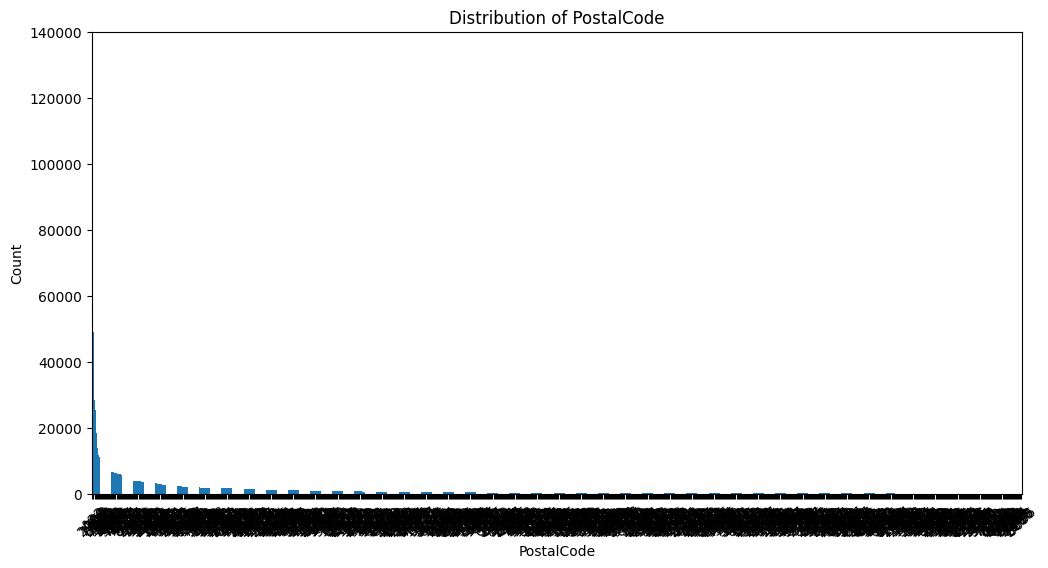

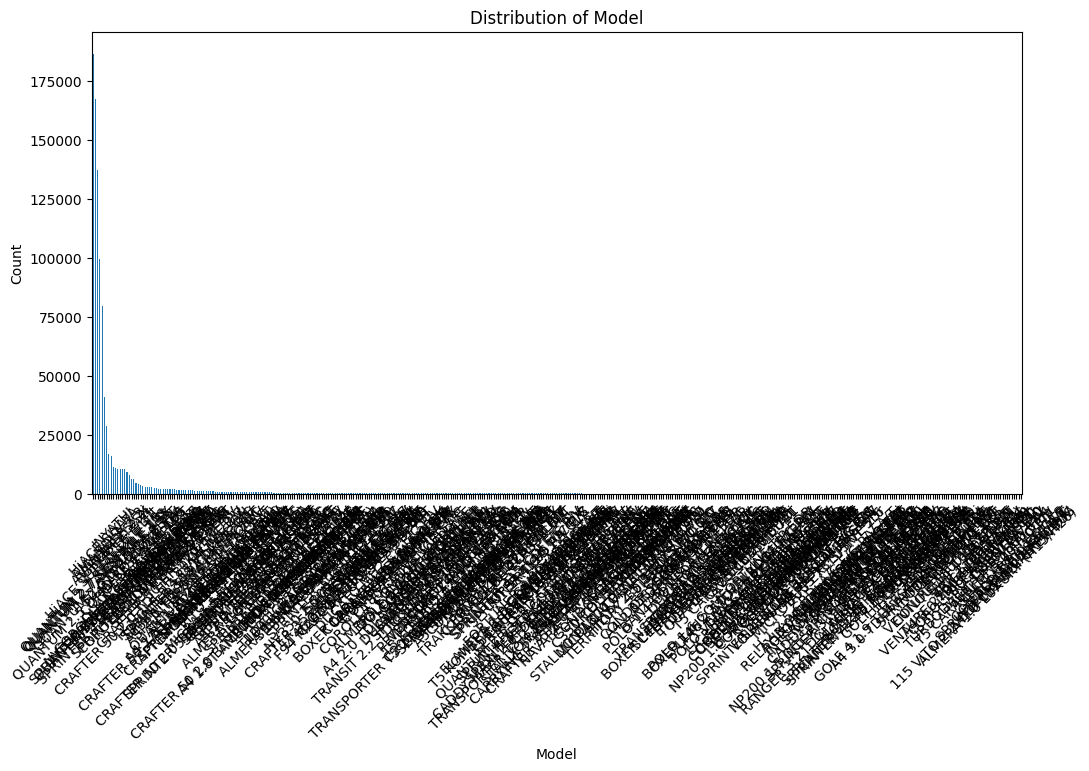

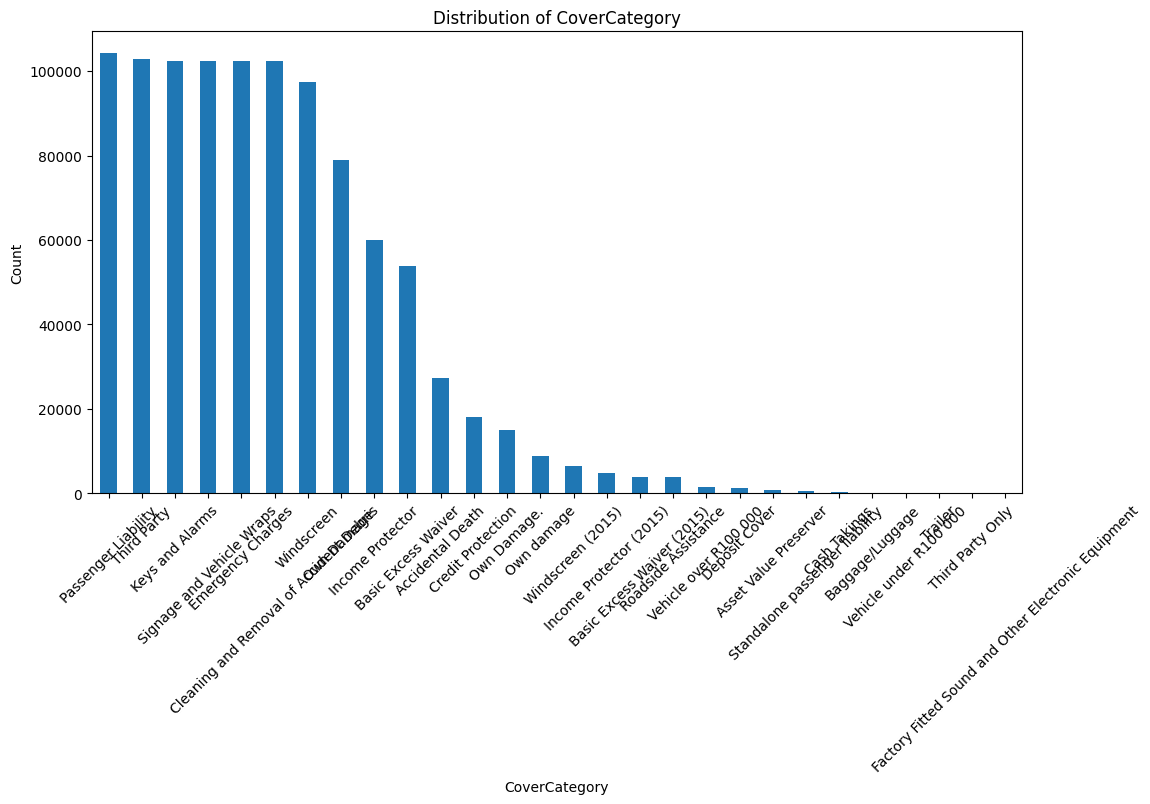

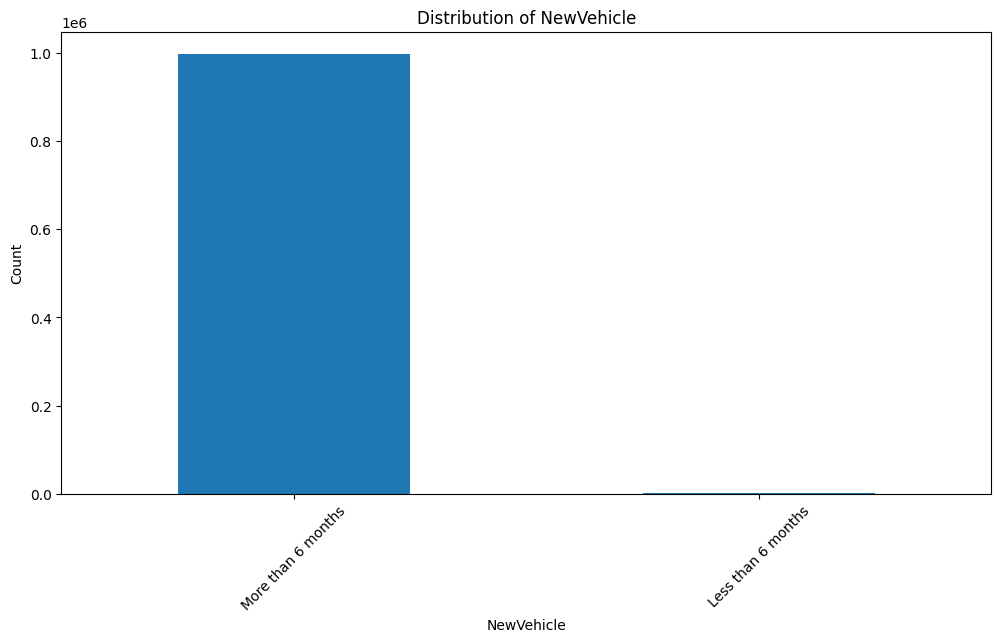

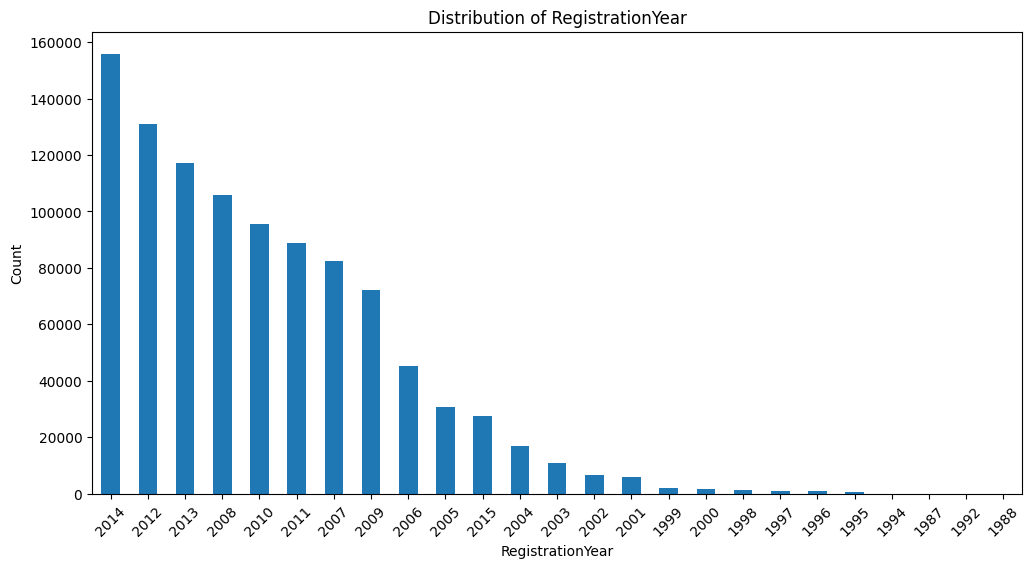

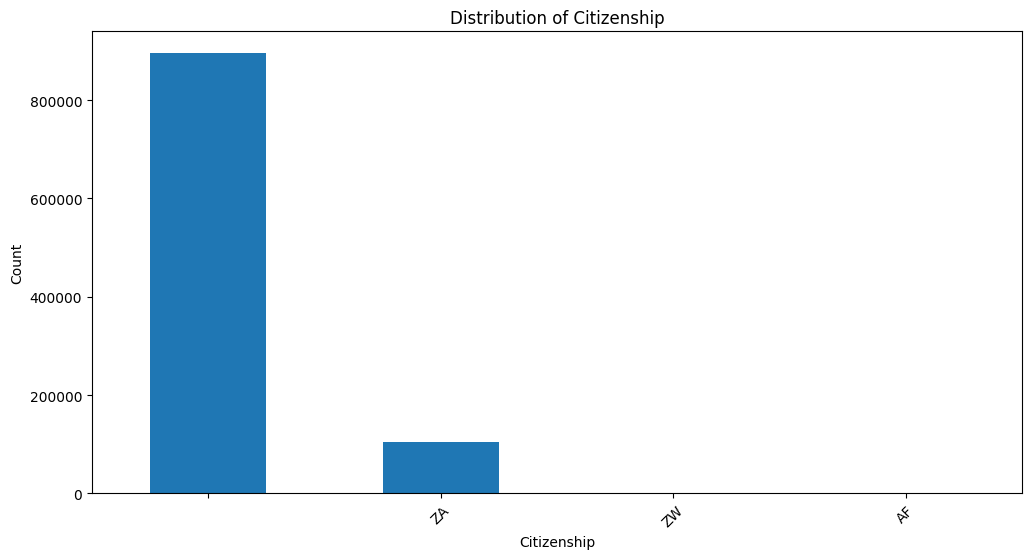

In [26]:
# univariate analysis for some key categorical columns 
categorical_columns=['Province', 'CoverType', 'VehicleType', 'make', 'Gender', 'MaritalStatus','PostalCode','Model','CoverCategory','NewVehicle','RegistrationYear','Citizenship' ]


# Plot bar charts for categorical columns
for col in categorical_columns:
    plot_bar_chart(df, col)

#### insights from the univariate analysis of numeric columns 
- Wide distribution across different postal codes, indicating geographical diversity in the customer base.
- Certain vehicle types (passenger vehicle) and make ( Toyota) are overrepresented in the data, suggesting these vehicles are insured more frequently.
- male tends be more policyholders than female.


## Bivariate Analysis
scatter plots and correlation heatmaps to understand relationships between variables.

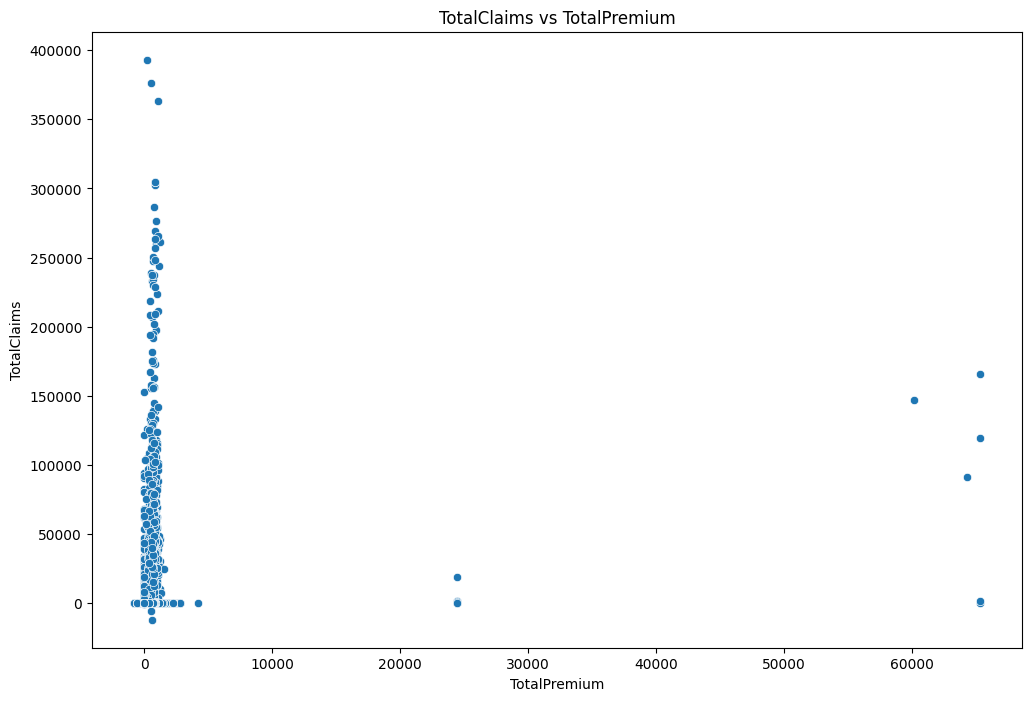

In [27]:
# scatter plot of 'TotalPremium' and 'TotalClaims'

plot_scatter( df, 'TotalPremium', 'TotalClaims')

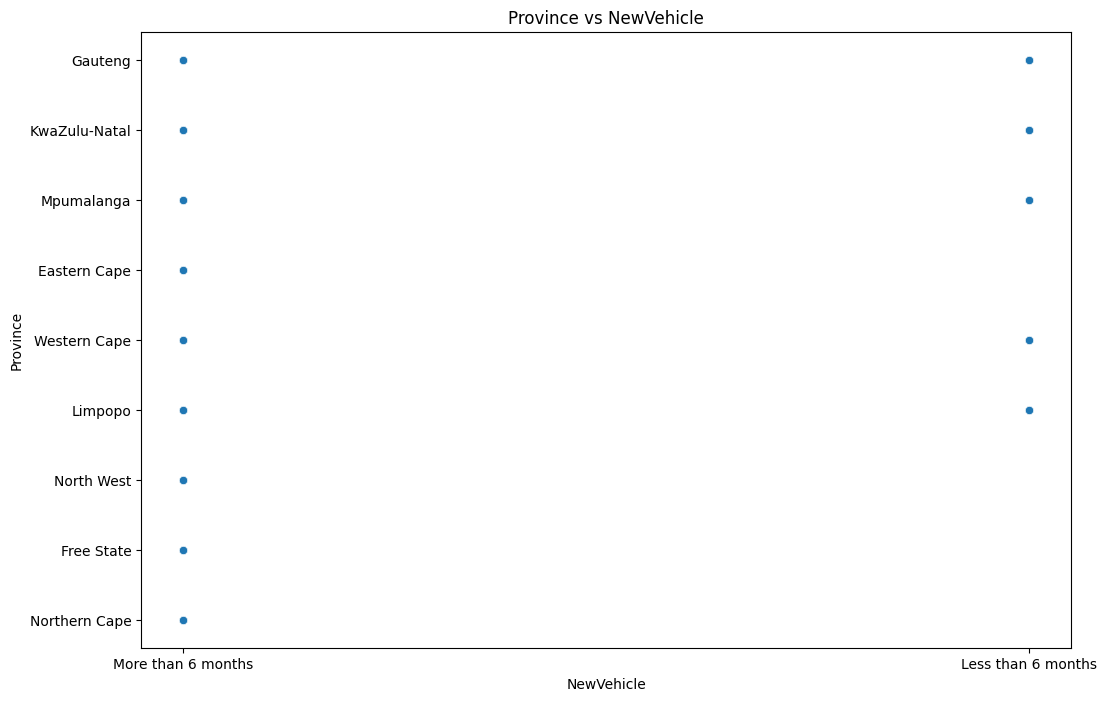

In [28]:
# Scatter plot for 'NewVehicle' and 'Province'

plot_scatter(df, 'NewVehicle', 'Province')


Let's study the correlation between different attributes in our dataset.

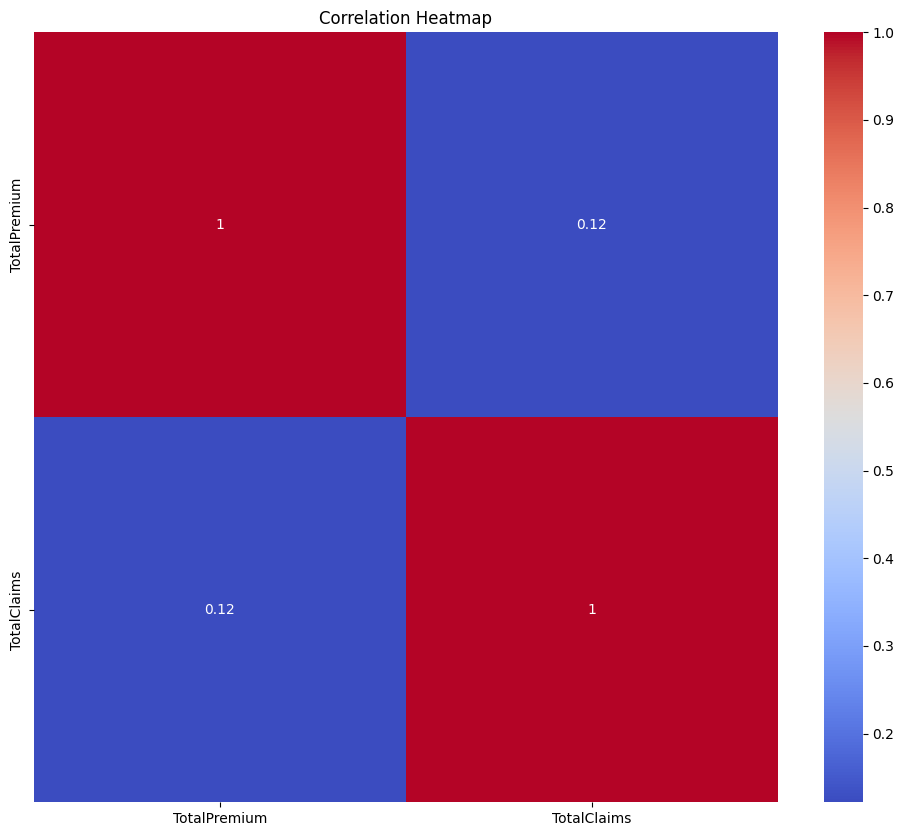

In [29]:
# Correlation between TotalPremium and TotalClaims

plot_correlation_heatmap(df, ['TotalPremium', 'TotalClaims'])

Based on the plot, it can be observed that the correlation between TotalPremium with TotalClaims is positive, but the correlation is weak with correlation coefficient of 0.12. This suggests that higher premiums generally result in higher claims but with significant variability.


Correlation between numerical columns

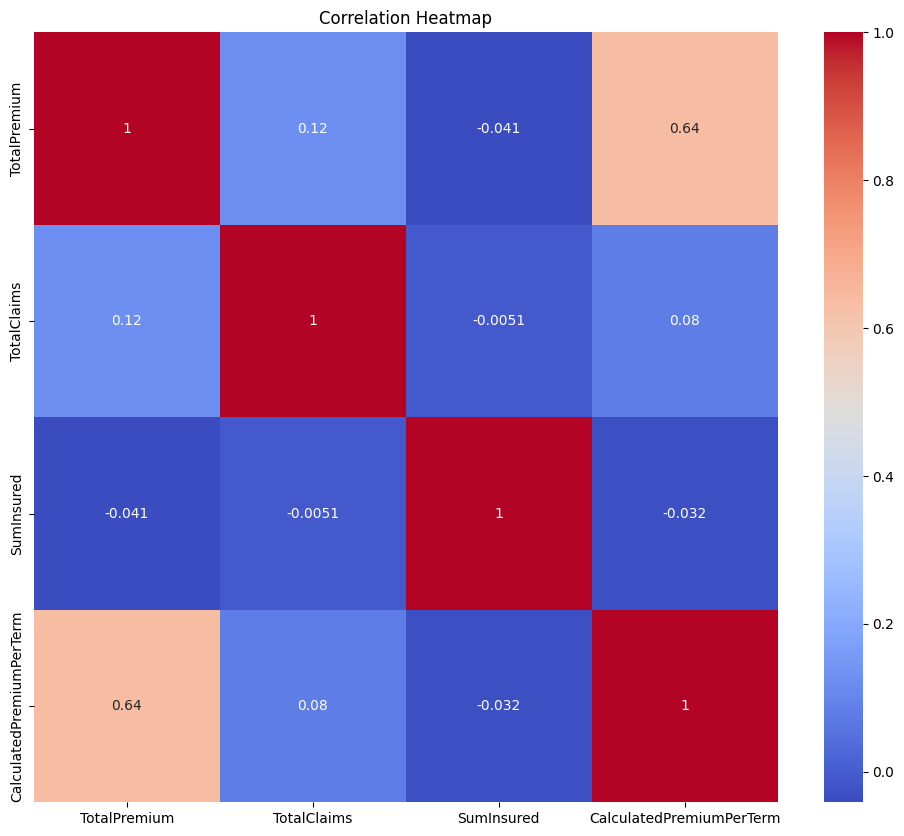

In [30]:
# Correlation between numerical columns 
plot_correlation_heatmap(df, numerical_columns)

From the correlation heatmap, we can see that 
- TotalPremium is strongly correlated with CalculatedPremiumPerTerm (0.64).
- TotalClaims shows weak correlations with the other variables, with a slight positive correlation to TotalPremium (0.12).
- SumInsured shows almost no significant correlation with the other variables.



### Multivariate analysis
scatter plots with multiple variables to understand complex relationships.

c:\Users\h\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


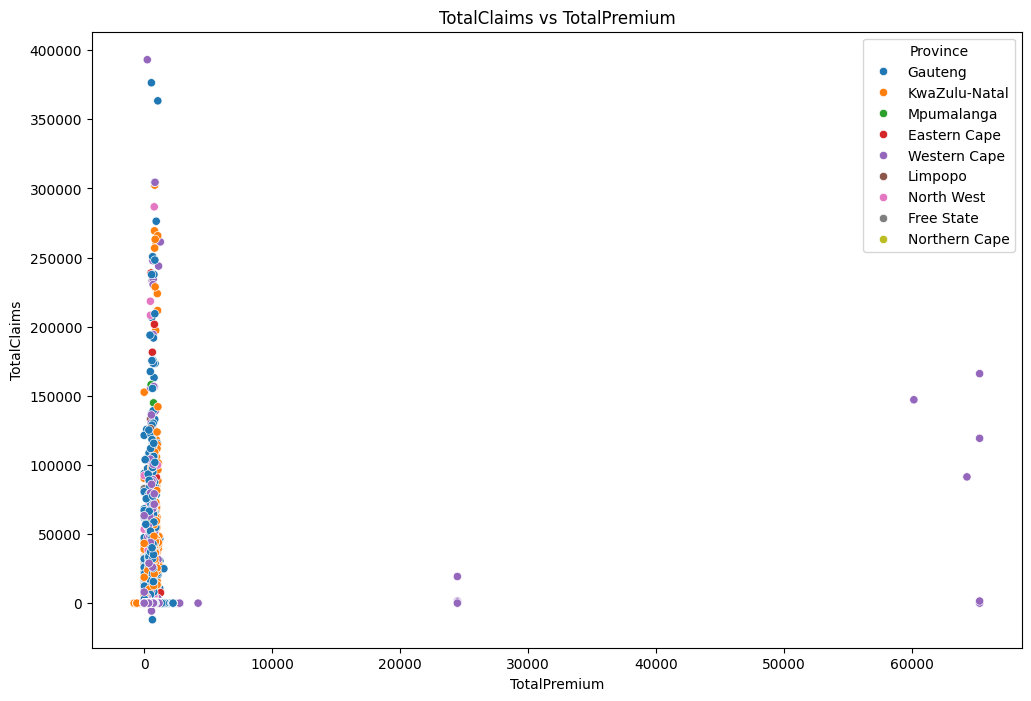

Correlation Matrix of TotalPremium vs TotalClaims by Province
Province
Eastern Cape     0.059646
Free State       0.054746
Gauteng          0.092761
KwaZulu-Natal    0.101787
Limpopo          0.053468
Mpumalanga       0.073857
North West       0.069032
Northern Cape    0.074800
Western Cape     0.203678
Name: TotalPremium, dtype: float64


In [31]:
# Scatter plot of TotalPremium vs TotalClaims, colored by Province
plot_scatter(df, 'TotalPremium', 'TotalClaims', 'Province')

# Correlation matrix
correlation_matrix_province = df.groupby('Province')[['TotalPremium', 'TotalClaims']].corr().unstack()['TotalClaims']['TotalPremium']

print("Correlation Matrix of TotalPremium vs TotalClaims by Province")
print(correlation_matrix_province)

- There are noticeable differences in claim patterns across provinces. For example, Gauteng and Western Cape provinces exhibit the highest claims relative to premiums.
- The majority of the data points (across most provinces) are clustered near the lower range of the TotalPremium axis, indicating lower premiums overall.
- provinces (e.g.Western Cape) that have both high TotalPremium and high TotalClaims, implies a higher risks in those areas.

correlation for columns ['TotalPremium', 'TotalClaims', 'MaritalStatus', 'Gender']

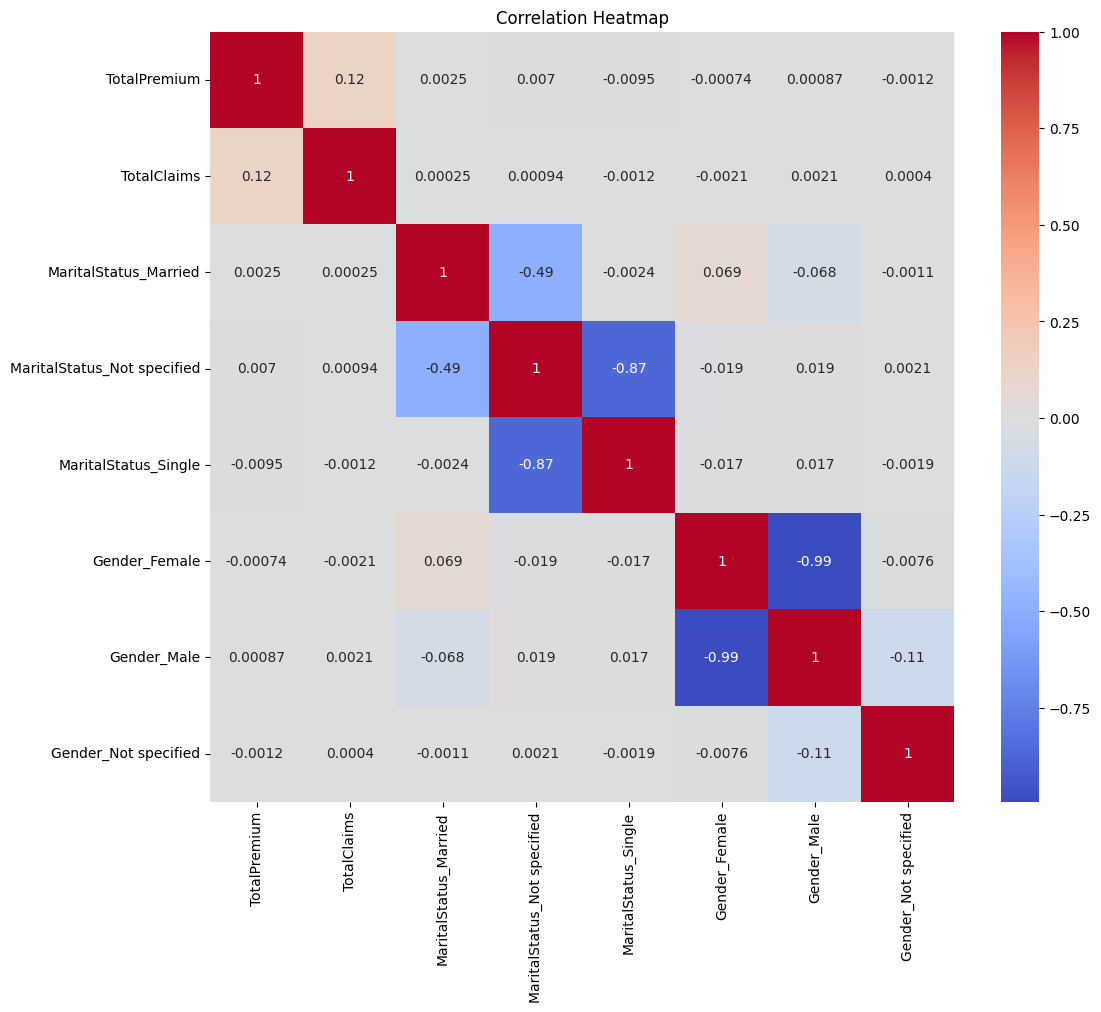

In [32]:
columns=['TotalPremium', 'TotalClaims', 'MaritalStatus', 'Gender']
columns_data = df[columns]

columns_data = pd.get_dummies(columns_data, columns=['MaritalStatus', 'Gender'])
plot_correlation_heatmap(columns_data, columns_data.columns)


- The correlation between "Gender_Female" and "TotalPremium" is approximately -0.00074. This indicates a very weak negative correlation, suggesting that being female has almost no direct linear impact on the total premium paid.
- Correlation with Gender_Male: Similarly, the correlation between "Gender_Male" and "TotalPremium" is approximately 0.00087, indicating an almost negligible positive correlation. This means being male also shows no significant linear effect on the total premium.

Overall Analysis: There seems to be almost no difference between male and female customers regarding the total premium paid.

- The correlation between "Gender_Female" and "TotalClaims" is approximately -0.0021, suggesting a very weak negative relationship. This implies that female customers might slightly tend to have fewer claims, but the effect is negligible.
- The correlation between "Gender_Male" and "TotalClaims" is approximately 0.0021, indicating a very slight positive relationship. This suggests that male customers might have marginally more claims

Overall Analysis: The correlations indicate that there is no substantial difference in the number of claims between male and female customers. The correlations are extremely close to zero, implying no strong linear relationship.

## Data Comparison
Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc


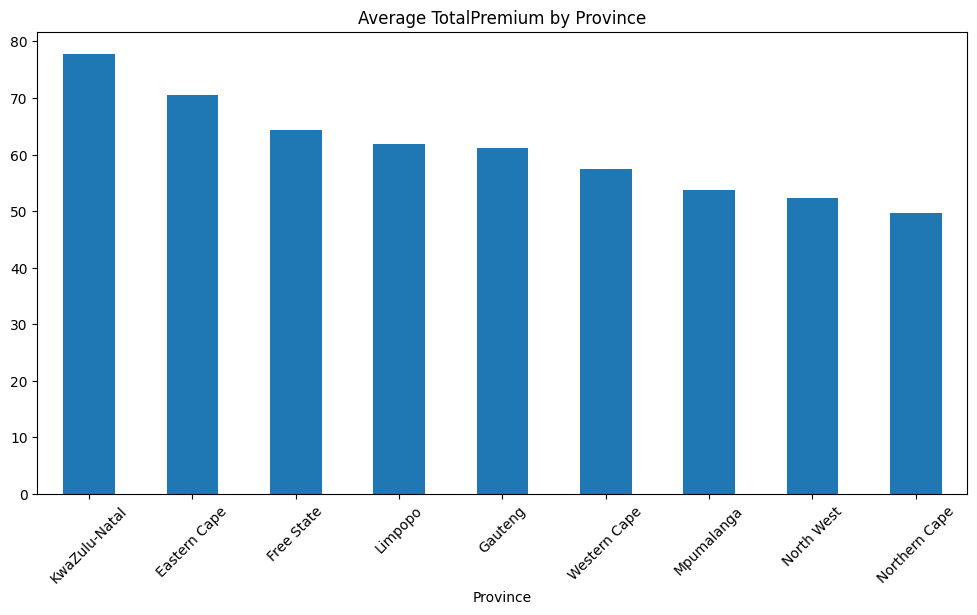

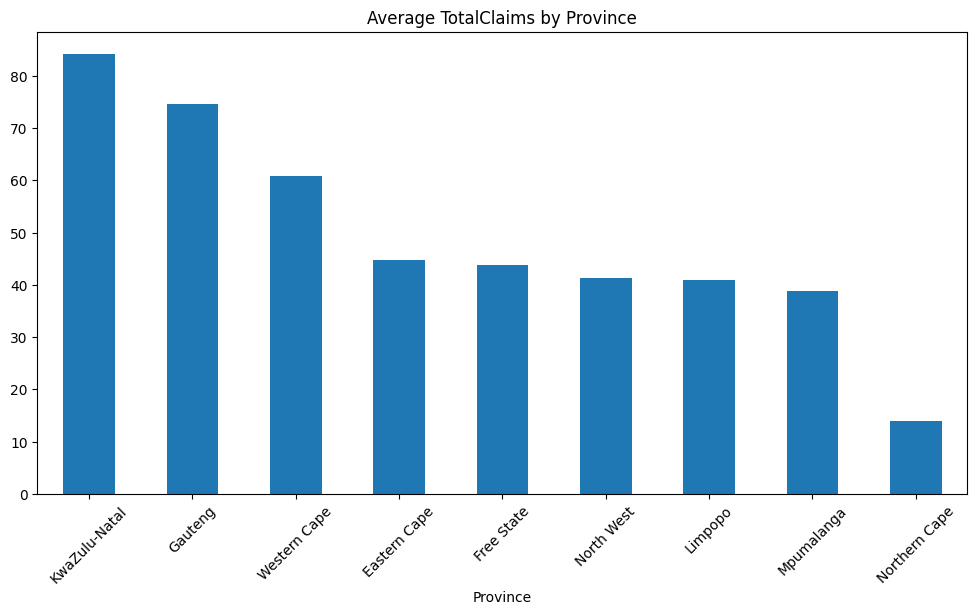

In [33]:
# Trends over geography
trend_over_geography(df, 'Province', 'TotalPremium')
trend_over_geography(df, 'Province', 'TotalClaims')

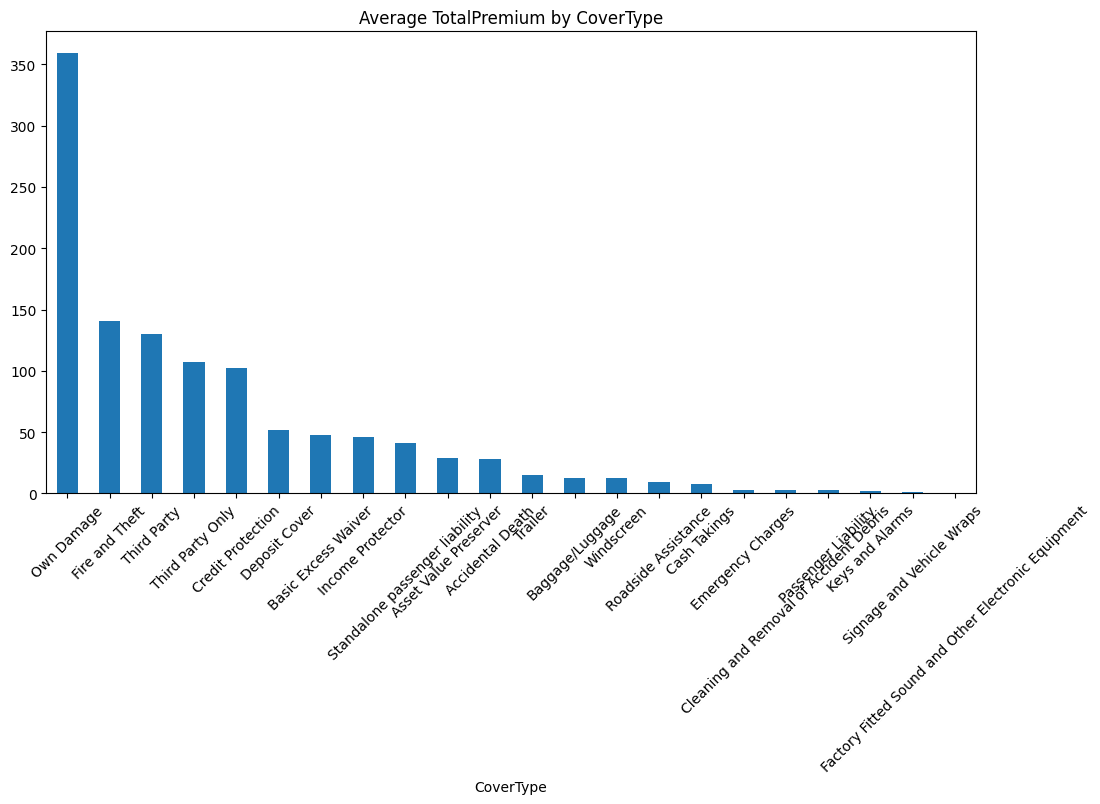

In [34]:
# Compare insurance cover type
trend_over_geography(df, 'CoverType', 'TotalPremium')

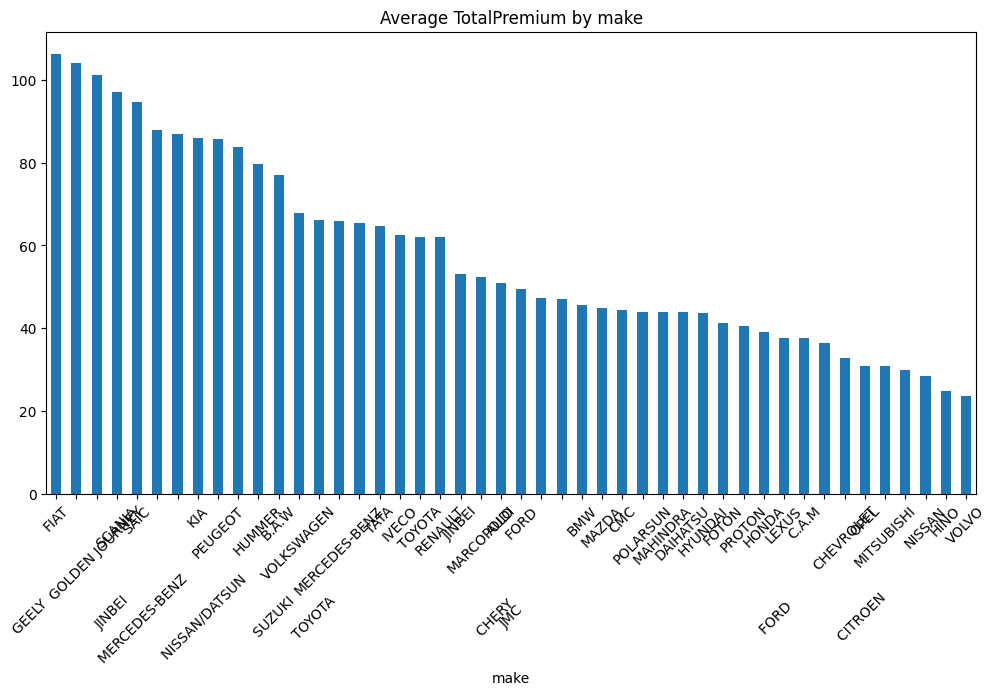

In [35]:
# Compare auto make
trend_over_geography(df, 'make', 'TotalPremium')

## Outlier Detection
Use box plots to detect outliers in numerical data

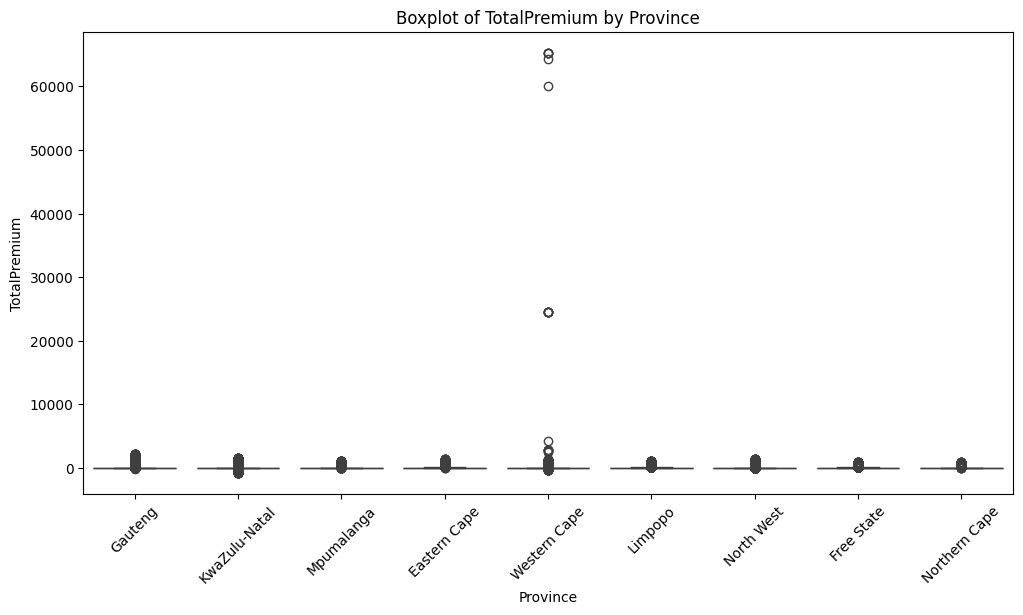

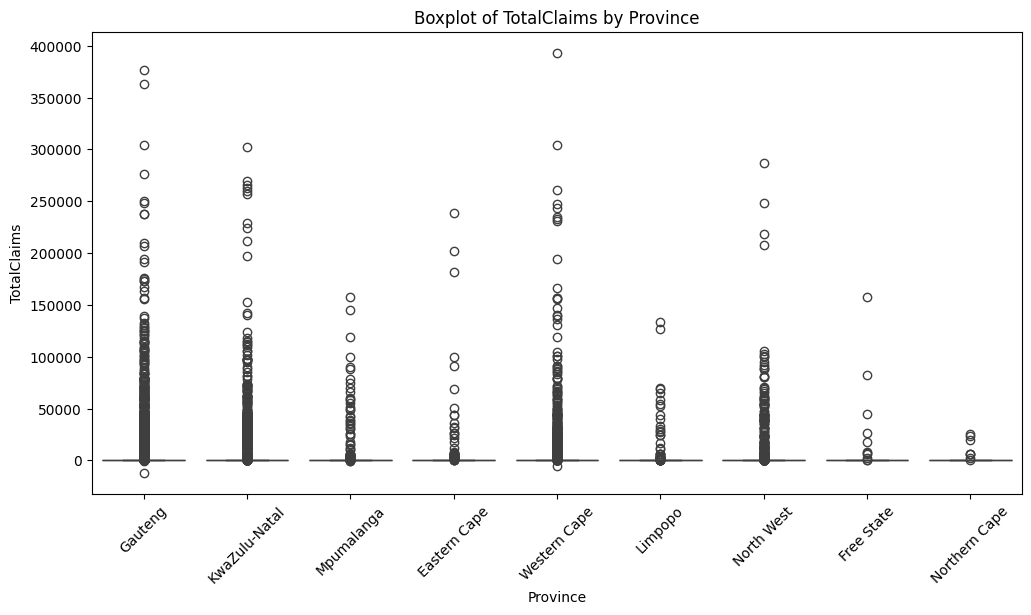

In [36]:
for col in ['TotalPremium', 'TotalClaims']:
    plot_boxplot(df, 'Province', col)

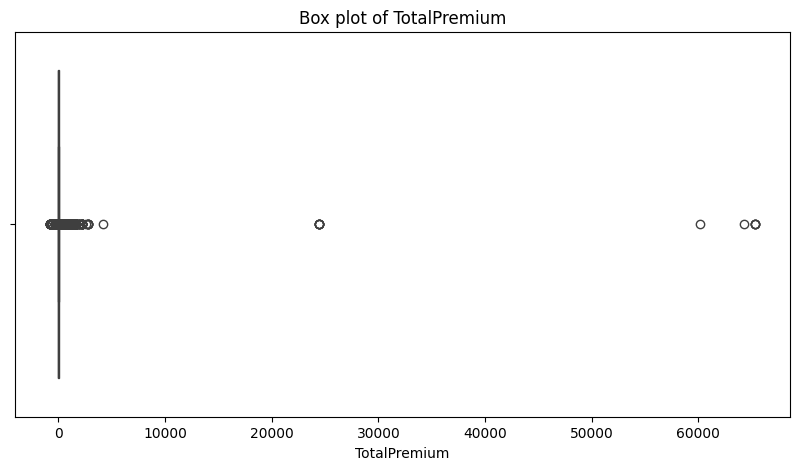

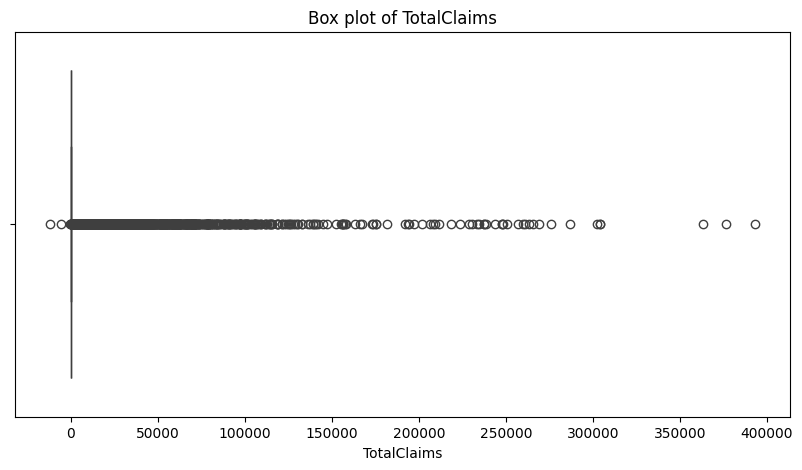

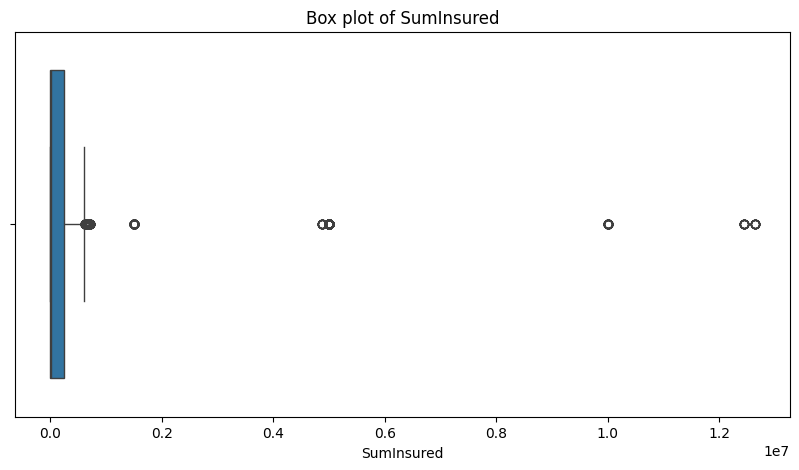

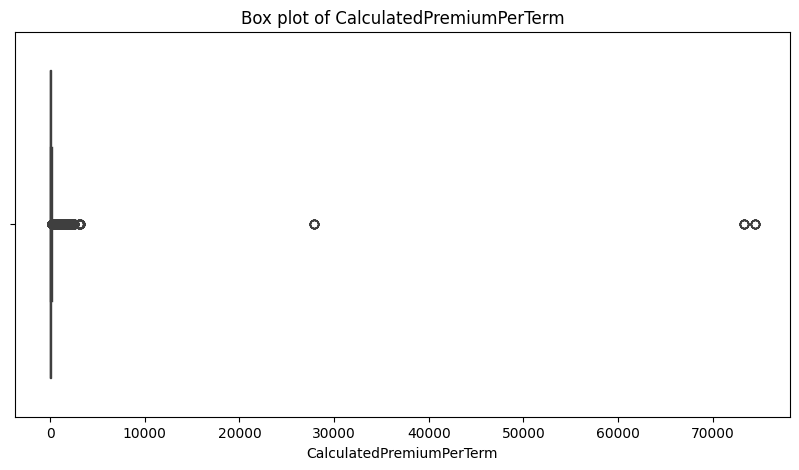

In [37]:
# outlier plot for each individual numeric column
df_numerical_cols = df[numerical_columns]
outlier_box_plots(df_numerical_cols)

#### insights from the outliers detection 
-	Significant outliers in TotalPremium and TotalClaims, with some extreme high values
-	SumInsured and CalculatedPremiumPerTerm also show outliers, but less extreme than TotalPremium and TotalClaims.


## Visualization

 insightful visualizations based on the business objectives:
- Risk vs Premium by Vehicle Type
- Premium Distribution by Gender and Marital Status
- Claims Ratio by Province
- TotalClaims vs VehicleType by Province

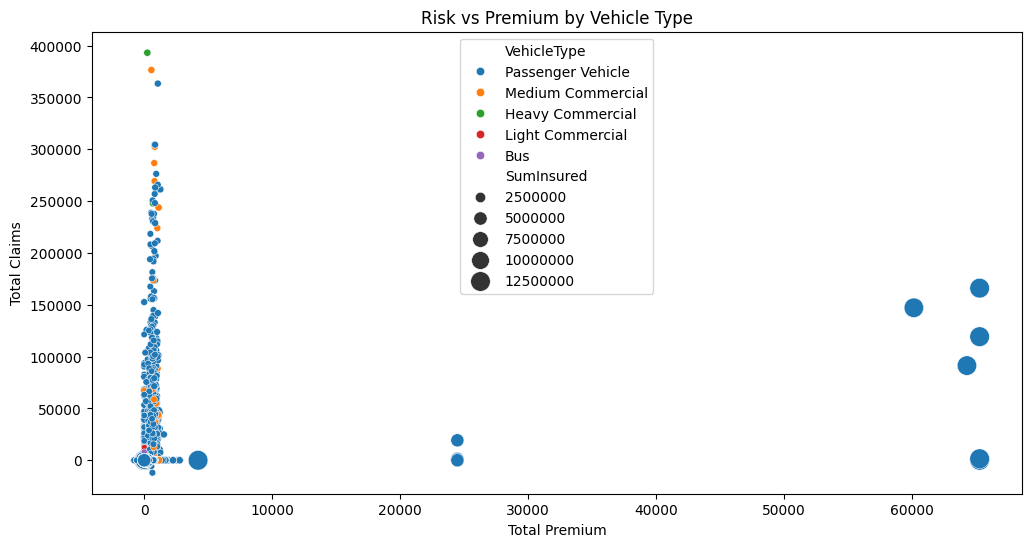

In [38]:
# 1. Risk vs Premium by Vehicle Type
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='VehicleType', size='SumInsured', sizes=(20, 200))
plt.title('Risk vs Premium by Vehicle Type')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(loc='upper center')
plt.show()

- The majority of the data points are clustered at the lower end of both the total premium and total claims axes. This indicates that most vehicles pay relatively low premiums and also incur low total claims
- Medium Commercial, Heavy Commercial, and Light Commercial vehicles are scattered more sporadically among the lower premiums and claim amounts.
- There are points where passenger vehicle show high premiums and relatively high claims 

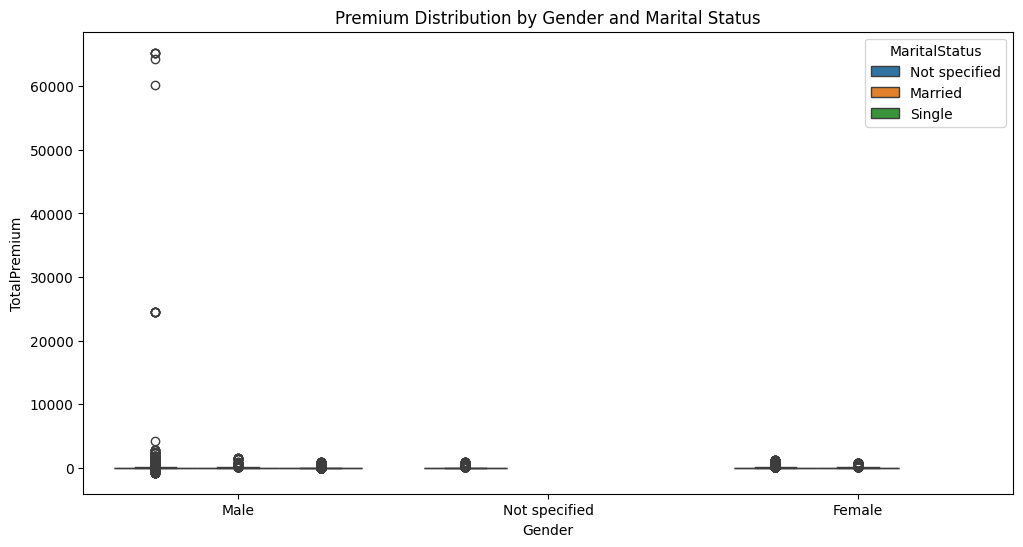

In [39]:
# 2. Premium Distribution by Gender and Marital Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='TotalPremium', hue='MaritalStatus')
plt.title('Premium Distribution by Gender and Marital Status')
plt.show()

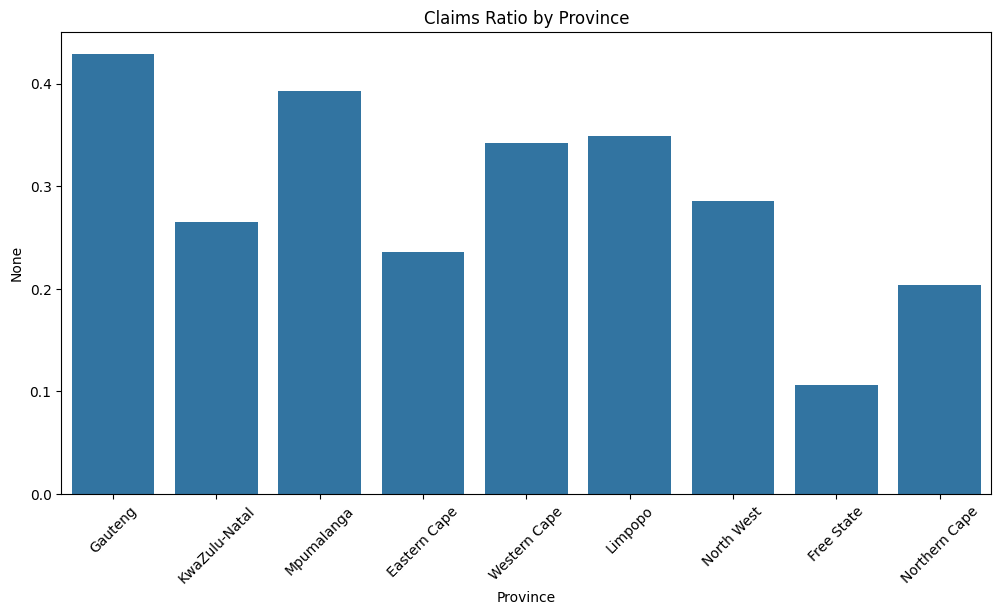

In [40]:
# 3. Claims Ratio (Claims/Premium) by Province
ClaimsRatio = df['TotalClaims'] / df['TotalPremium']
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Province', y=ClaimsRatio, errorbar=None)
plt.title('Claims Ratio by Province')
plt.xticks(rotation=45)
plt.show()

- Gauteng stands out with the highest claims ratio, exceeding 0.4. This could indicate a higher occurrence of claims in this province.
- Mpumalanga, Western Cape, and Limpopo also exhibit relatively high claims ratio
- KwaZulu-Natal, Eastern Cape, Free State, and Northern Cape display lower claims ratios. The Free State has the lowest claims ratio among all provinces


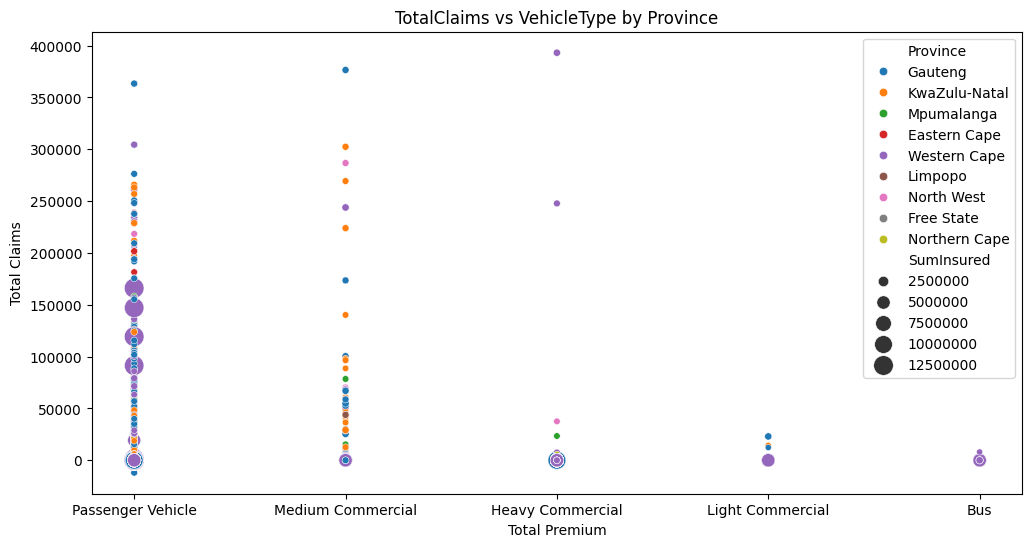

In [41]:
#  TotalClaims vs VehicleType by Province
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='VehicleType', y='TotalClaims', hue='Province', size='SumInsured', sizes=(20, 200))
plt.title('TotalClaims vs VehicleType by Province')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(loc='upper right')
plt.show()

### Outlier Capping Using IQR Method
handle extreme values in numeric columns using the Interquartile Range (IQR) method. Instead of removing outliers, which can lead to loss of potentially important data cap the outliers to a specified range.

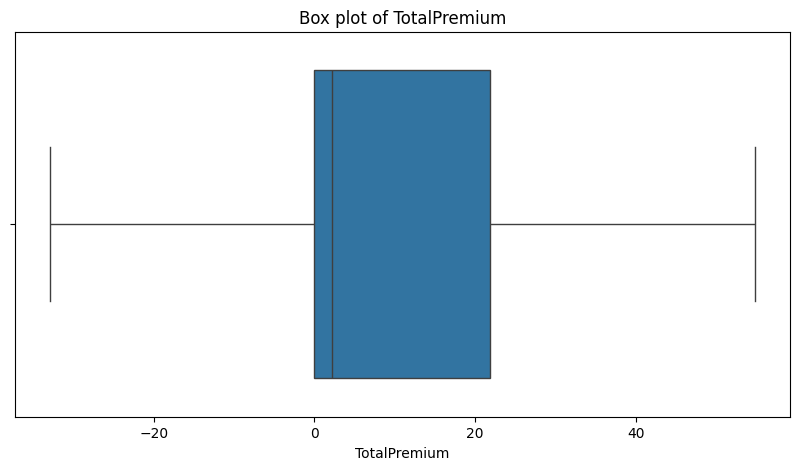

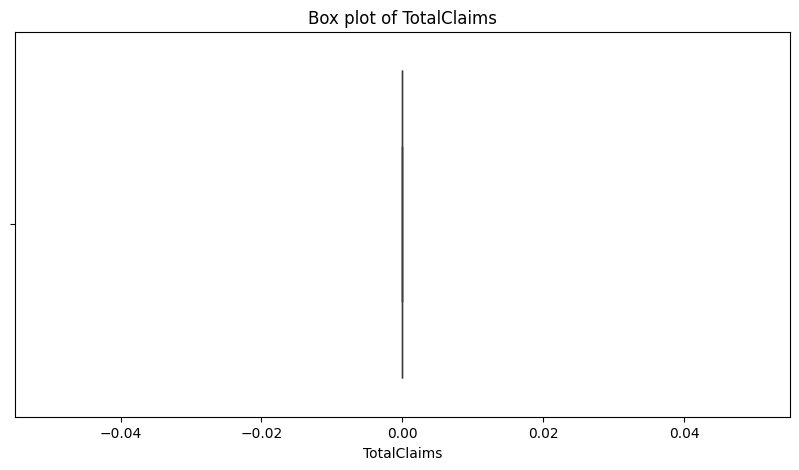

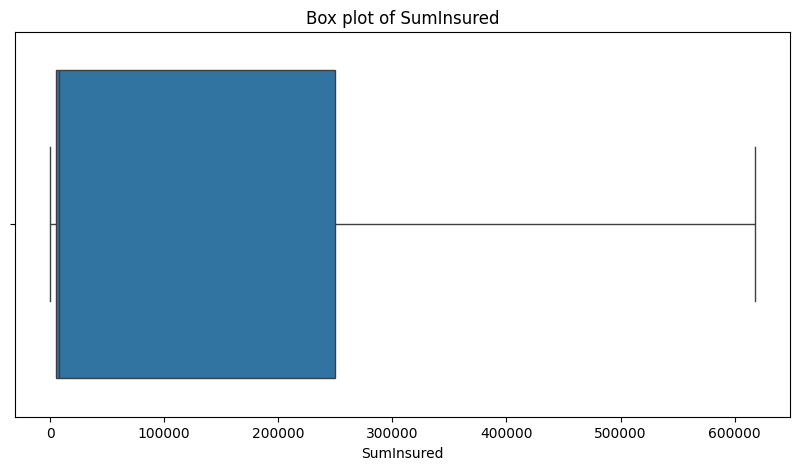

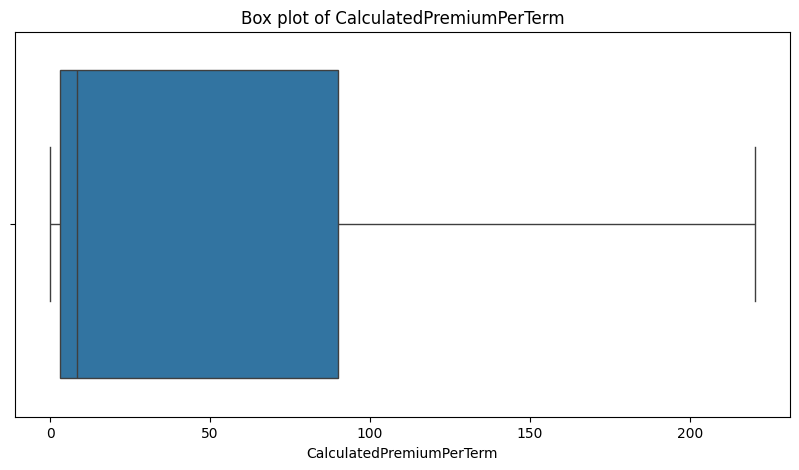

In [42]:
df_capped = cap_outliers(df, numerical_columns)
outlier_box_plots(df_capped[numerical_columns])

In [43]:
# Save the cleaned data to csv 
df_capped.to_csv('../data/cleaned_insurance_data.csv')